In [4]:
import numpy as np
import matplotlib.pyplot as plt
import timeit

np.random.seed(42)

start=timeit.default_timer()


n=50000 # количество циклов
tax_ratio=0.32 # налоговая ставка
years=np.arange(3)

price=np.array([
    np.random.triangular(5.9,6,6.1,n),
    np.random.triangular(5.95,6.05,6.15,n),
    np.random.triangular(6.0,6.2,6.5,n)])

value=np.array([
    np.random.normal(802000,25,n),
    np.random.normal(967000,30,n),
    np.random.normal(1132000,25,n)])

unit_cost=np.random.triangular(0.5,0.55,0.65,(3,n))

operating_cost_ratio=np.random.normal(0.15,0.02,(3,n))

revenue=np.array([price[y]*value[y] for y in years]) # выручка

cost_price=np.array([unit_cost[y]*revenue[y] for y in years]) # себестоимость

gross_profit=np.array([revenue[y]-cost_price[y] for y in years]) # выловая прибыль

transaction_costs=np.array([operating_cost_ratio[y]*gross_profit[y] for y in years])

neat_income_tax=np.array([gross_profit[y]-transaction_costs[y] for y in years])

tax=np.array([tax_ratio*neat_income_tax[y] for y in years])

neat_income=np.array([neat_income_tax[y]-tax[y] for y in years])

net_in=np.vstack((np.full(n, -3400000.),neat_income))

years=np.arange(np.ndim(net_in))

NPV=np.array([np.npv(0.1,net_in[::,i]) for i in np.arange(n)]).round(2)
IRR=np.array([np.irr(net_in[::,i]) for i in np.arange(n)]).round(3)

print("время расчета: ",timeit.default_timer()-start)

время расчета:  6.866371065000067


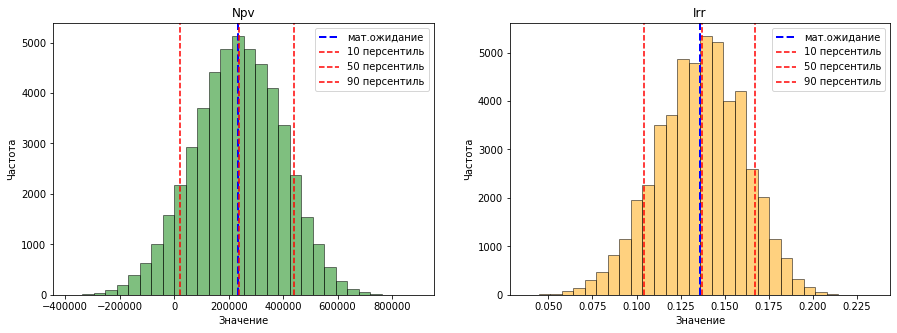

мат.ожидание npv: 234325.89
мат.ожидание irr: 0.136
npv перцентили {10: 22959.18, 50: 236524.27, 90: 438991.36}
irr перцентили {10: 0.104, 50: 0.137, 90: 0.167}


In [2]:
per=[10,50,90]
q_position_npv = { i: int(np.percentile(NPV, i)*100)/100.0 for i in  per}
q_position_irr = { i: int(np.percentile(IRR, i)*1000)/1000.0 for i in  per}
npv_mean=np.mean(NPV).round(2)
irr_mean=np.mean(IRR).round(3)


fig,ax = plt.subplots(1,2, figsize=(15,5))

ax[0].set_xlabel('Значение')
ax[0].set_ylabel('Частота')
ax[0].hist(NPV, bins=30,color='green',alpha=0.5,edgecolor='black')
ax[0].set_title(r'Npv')
ax[0].axvline(npv_mean,color='b',linewidth=2, linestyle='--',label='мат.ожидание')
for q in q_position_npv.keys():
    ax[0].axvline(x=q_position_npv[q], color='r', linestyle='--', label='%s персентиль'%q)
ax[0].legend()


ax[1].set_xlabel('Значение')
ax[1].set_ylabel('Частота')
ax[1].hist(IRR, bins=30,color='orange',alpha=0.5,edgecolor='black')
ax[1].set_title("Irr")
ax[1].axvline(irr_mean,color='b',linewidth=2, linestyle='--',label='мат.ожидание')
for q in q_position_irr.keys():
    ax[1].axvline(x=q_position_irr[q], color='r', linestyle='--', label='%s персентиль'%q)
ax[1].legend()

plt.show()

print('мат.ожидание npv:',npv_mean)
print('мат.ожидание irr:',irr_mean)

print("npv перцентили", q_position_npv)
print("irr перцентили", q_position_irr)

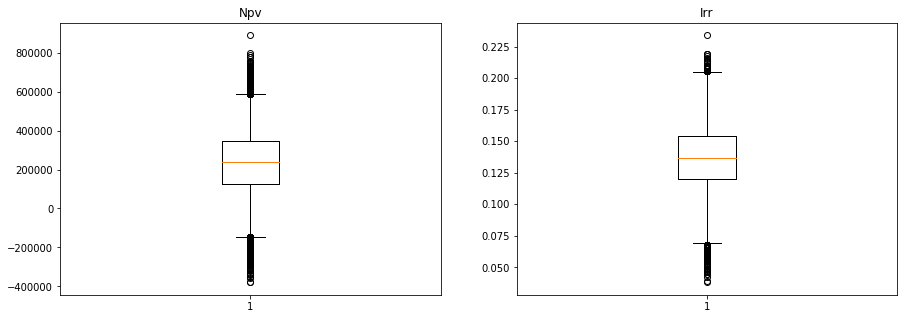

In [3]:
fig,bx = plt.subplots(1,2, figsize=(15,5))

bx[0].boxplot(NPV,whis=[1,99])
bx[0].set_title("Npv")
bx[1].boxplot(IRR)
bx[1].set_title("Irr")

plt.show()


/Users/iMac/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  if sys.path[0] == '':


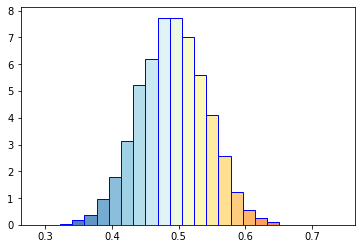

In [4]:
import numpy as n
import matplotlib.pyplot as plt

# Random gaussian data.
Ntotal = 10000
data = 0.05 * n.random.randn(Ntotal) + 0.5

# This is  the colormap I'd like to use.
cm = plt.cm.get_cmap('RdYlBu_r')

# Get the histogramp
Y,X = n.histogram(data, 25, normed=1)
x_span = X.max()-X.min()
C = [cm(((x-X.min())/x_span)) for x in X]

plt.bar(X[:-1],Y,color=C,width=X[1]-X[0],edgecolor='blue')
plt.show()

